                                                    OVERFITTING & UNDERFITTING 

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [2]:
#loading the data 

breast = load_breast_cancer()
x = breast.data
y = breast.target

In [3]:
x_train , x_test , y_train , y_test = train_test_split( x , y , random_state = 42)

In [4]:
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)
pred = dt.predict(x_test)

In [5]:
accuracy_score(y_test , pred)

0.9440559440559441

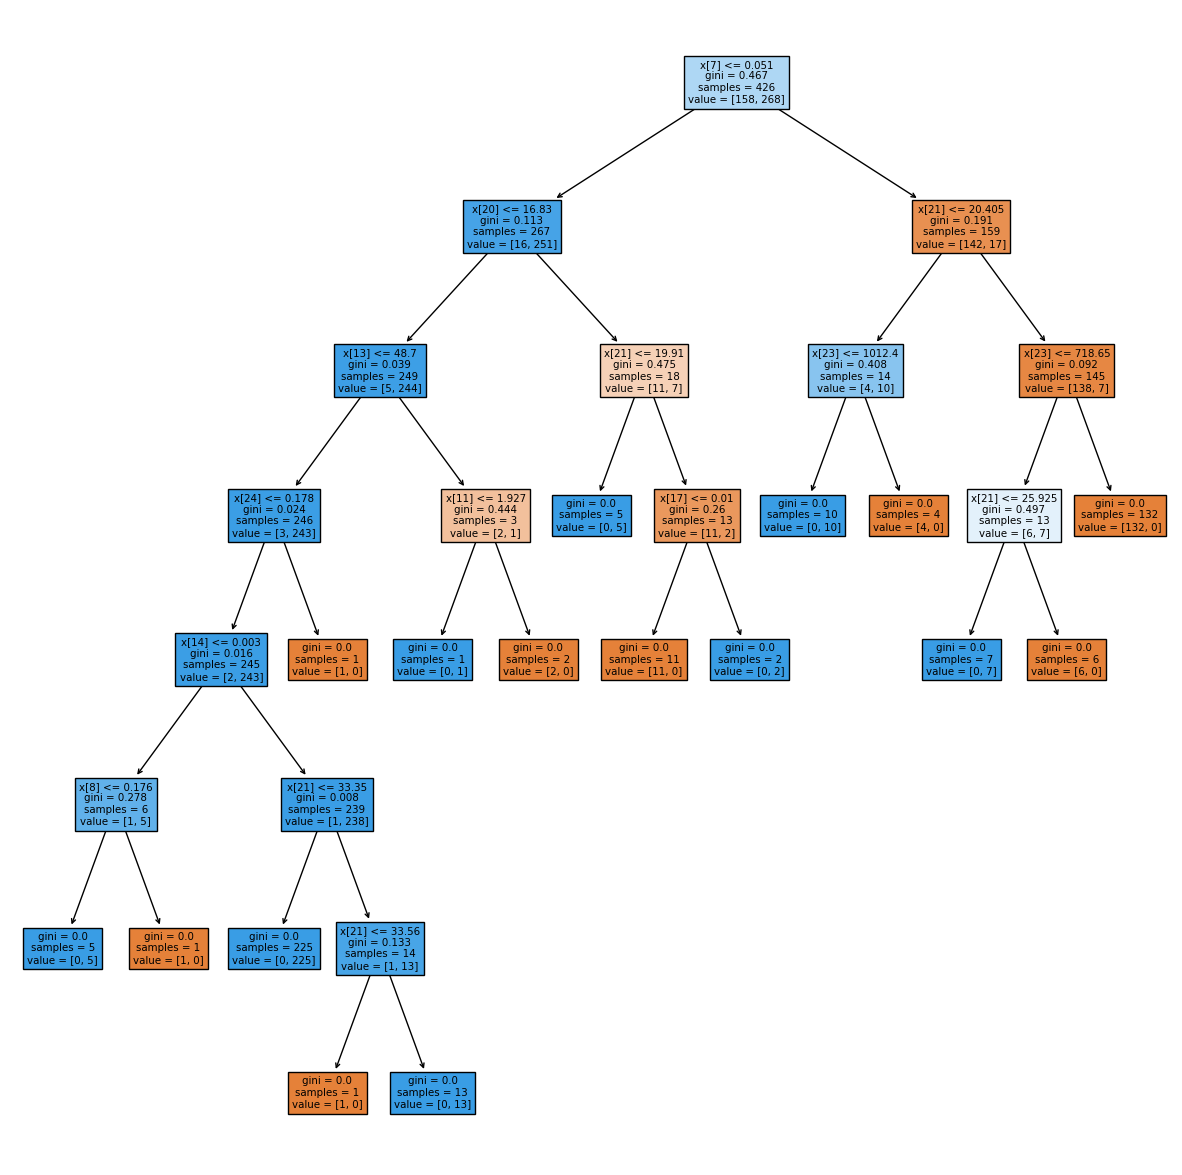

In [6]:
from sklearn import tree

plt.figure(figsize = (15,15))
tree.plot_tree( dt , filled = True)
plt.show()

## Pre Pruning

In [7]:
#lets limit the maximum depth to 3

dt_pre = DecisionTreeClassifier( max_depth = 3 , random_state = 43)
dt_pre.fit(x_train , y_train)
pred_pre = dt_pre.predict(x_test)

In [8]:
accuracy_score(pred_pre , y_test)

0.958041958041958

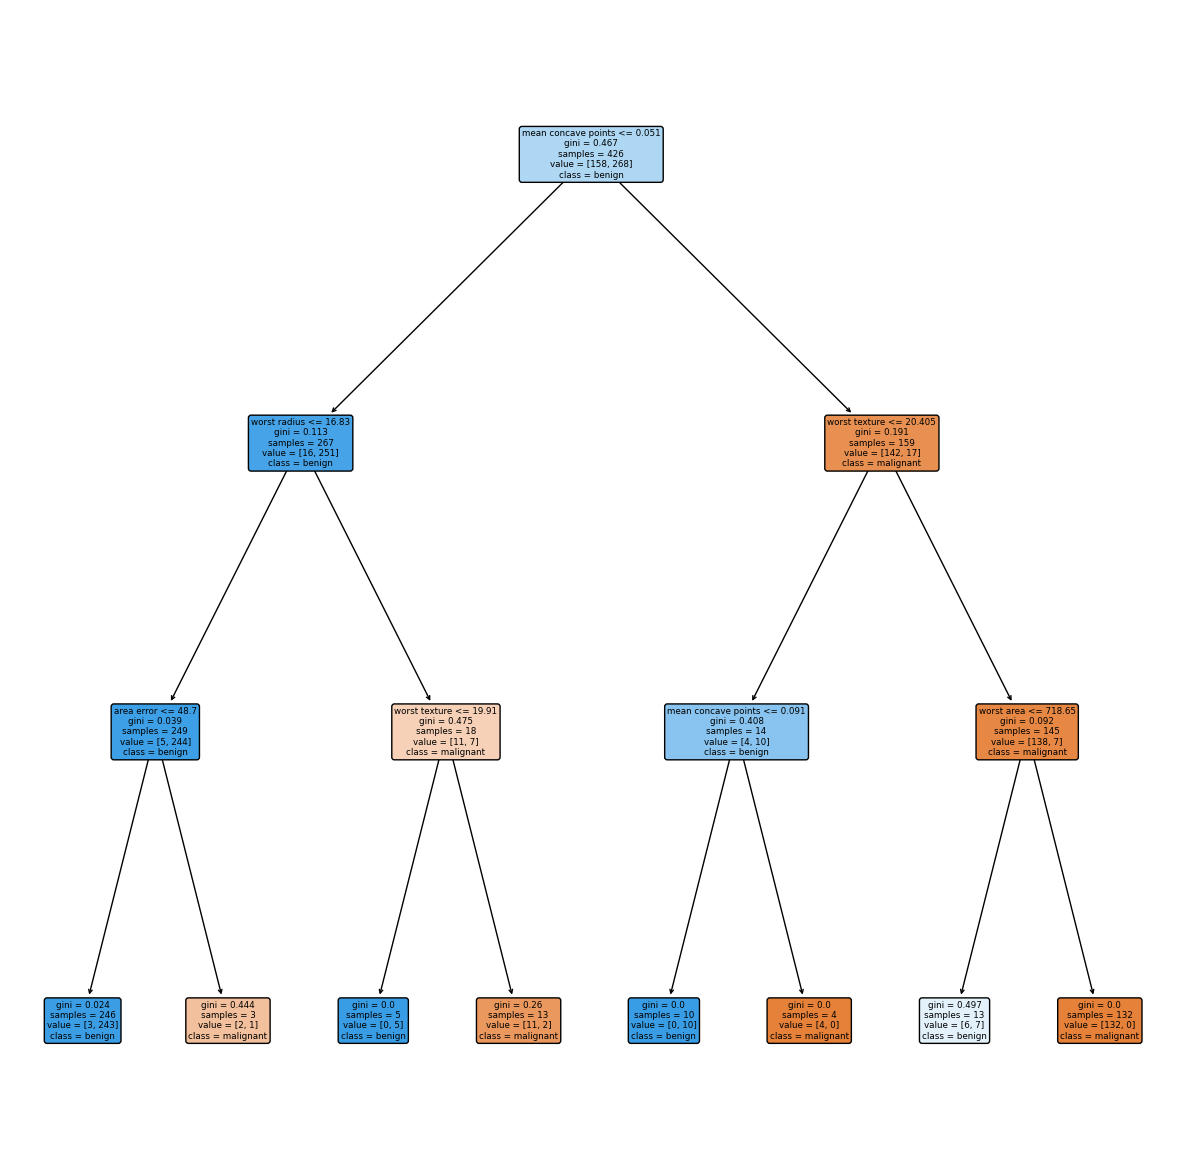

In [9]:
from sklearn import tree

plt.figure(figsize = (15,15))
tree.plot_tree( dt_pre , filled = True , feature_names = breast.feature_names , class_names = breast.target_names , rounded = True)
plt.show()

## Post Pruning GridSearchCV

In [10]:
##Getting the best alpha value using GridSearchCV

from sklearn.model_selection import GridSearchCV

dt_cv = DecisionTreeClassifier(random_state = 56)

#initializing the gridsearchcv
grid = GridSearchCV(dt_cv  , {} , cv = 10 , scoring = 'accuracy')
grid.fit(x_train , y_train)

best_alpha = grid.best_estimator_.ccp_alpha
print("Best Alpha: ", best_alpha)

Best Alpha:  0.0


In [11]:
dt_post = DecisionTreeClassifier( random_state = 48 , ccp_alpha = best_alpha) #initializing new tree with alphas 
dt_post.fit(x_train , y_train)
pred_post = dt_post.predict(x_test)

In [12]:
accuracy_score(pred_post , y_test)

0.9440559440559441

## Post Pruning - Cost Complexity

In [13]:
path = dt.cost_complexity_pruning_path(x_train , y_train)
ccp_alphas , impurities = path.ccp_alphas , path.impurities
ccp_alphas

#we get a list of all weak points of the nodes

array([0.        , 0.00232826, 0.00312989, 0.00459972, 0.00596017,
       0.00794511, 0.01213836, 0.01341382, 0.01516793, 0.01610939,
       0.02658769, 0.02752968, 0.32476748])

In [14]:
# now we will iterate through all the values in ccp and apply them to our decsion tree model and store em in x

clfs = []
for ccp_alpha in ccp_alphas: 
    clf = DecisionTreeClassifier( random_state = 34 , ccp_alpha = ccp_alpha)
    clf.fit(x_train , y_train)
    clfs.append(clf)

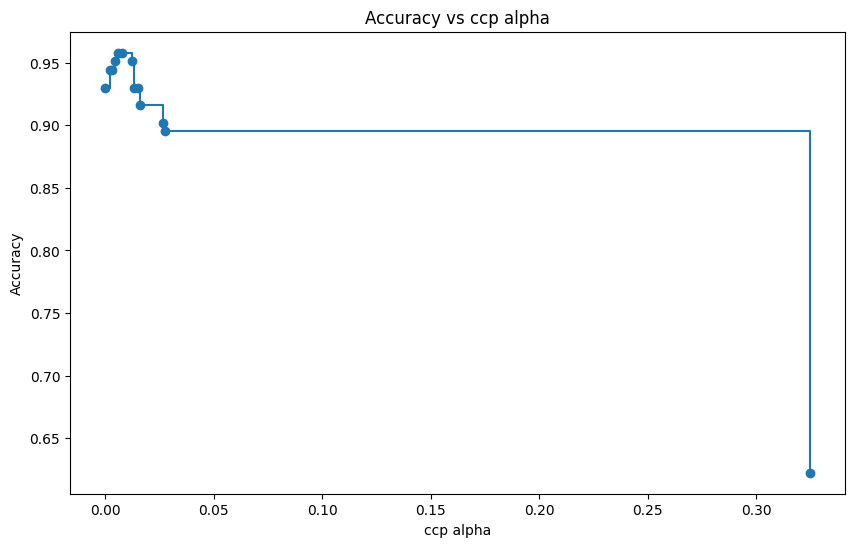

In [15]:
## Plotting accuracy vs alpha 

acc = [accuracy_score(y_test , clf.predict(x_test)) for clf in clfs]

plt.figure(figsize = (10 , 6))
plt.plot( ccp_alphas , acc , marker = 'o' , drawstyle = "steps-post")
plt.xlabel("ccp alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs ccp alpha")
plt.show()

In [16]:
optimal_alpha = ccp_alphas[np.argmax(acc)]
optimal_alpha

0.005960174144419194

In [17]:
dt_ccp = DecisionTreeClassifier( random_state = 48 , ccp_alpha = optimal_alpha) #initializing new tree with alphas 
dt_ccp.fit(x_train , y_train)
pred_ccp = dt_ccp.predict(x_test)

In [18]:
accuracy_score(pred_ccp , y_test)

0.958041958041958

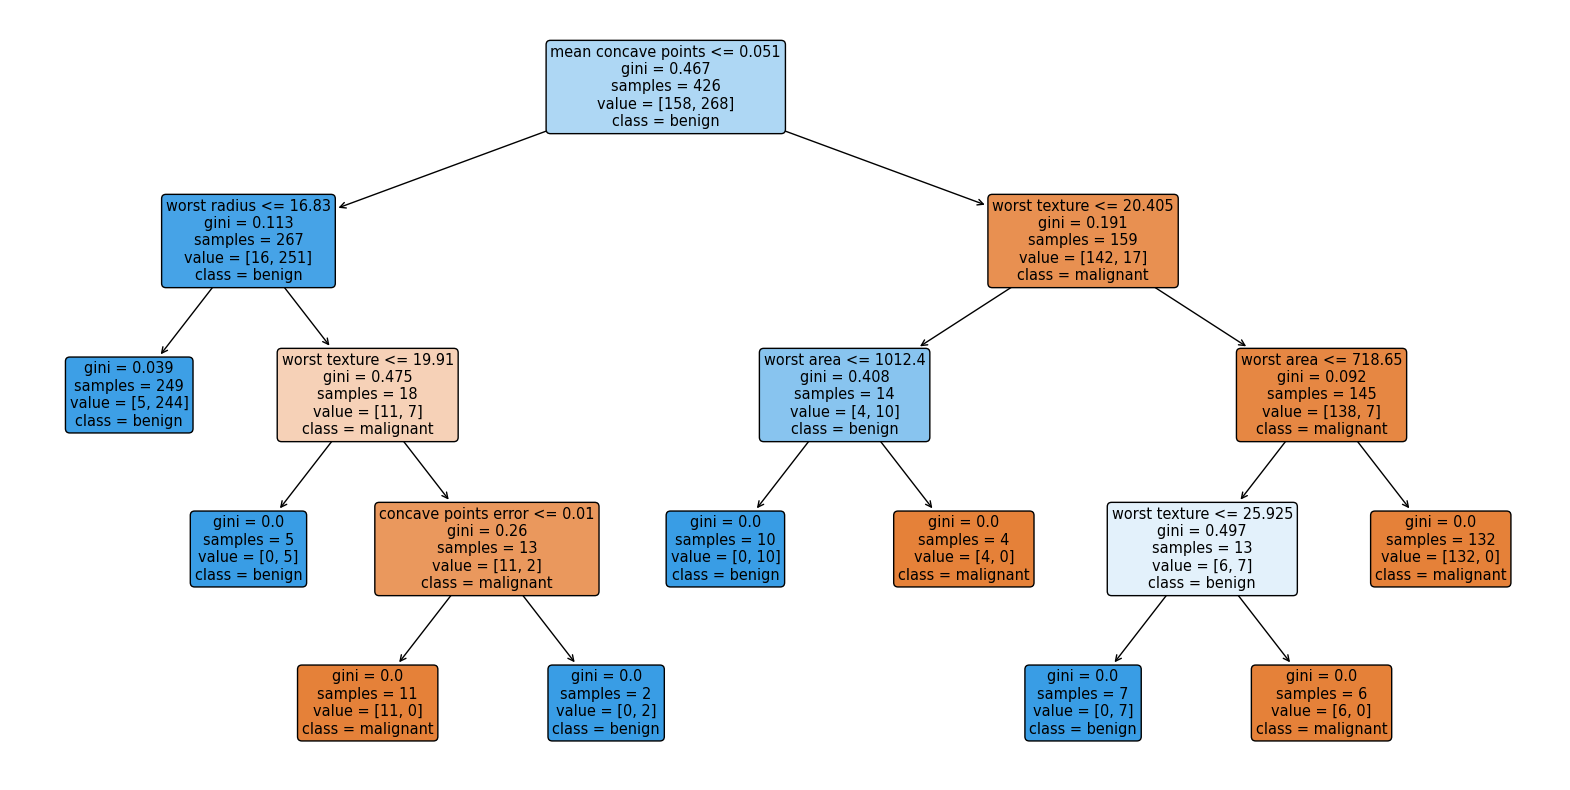

In [26]:
#visualizing the tree

plt.figure(figsize = (20 , 10))
tree.plot_tree(dt_ccp , filled = True , feature_names = breast.feature_names , class_names = breast.target_names , rounded = True)
plt.show()

## Tree visualization

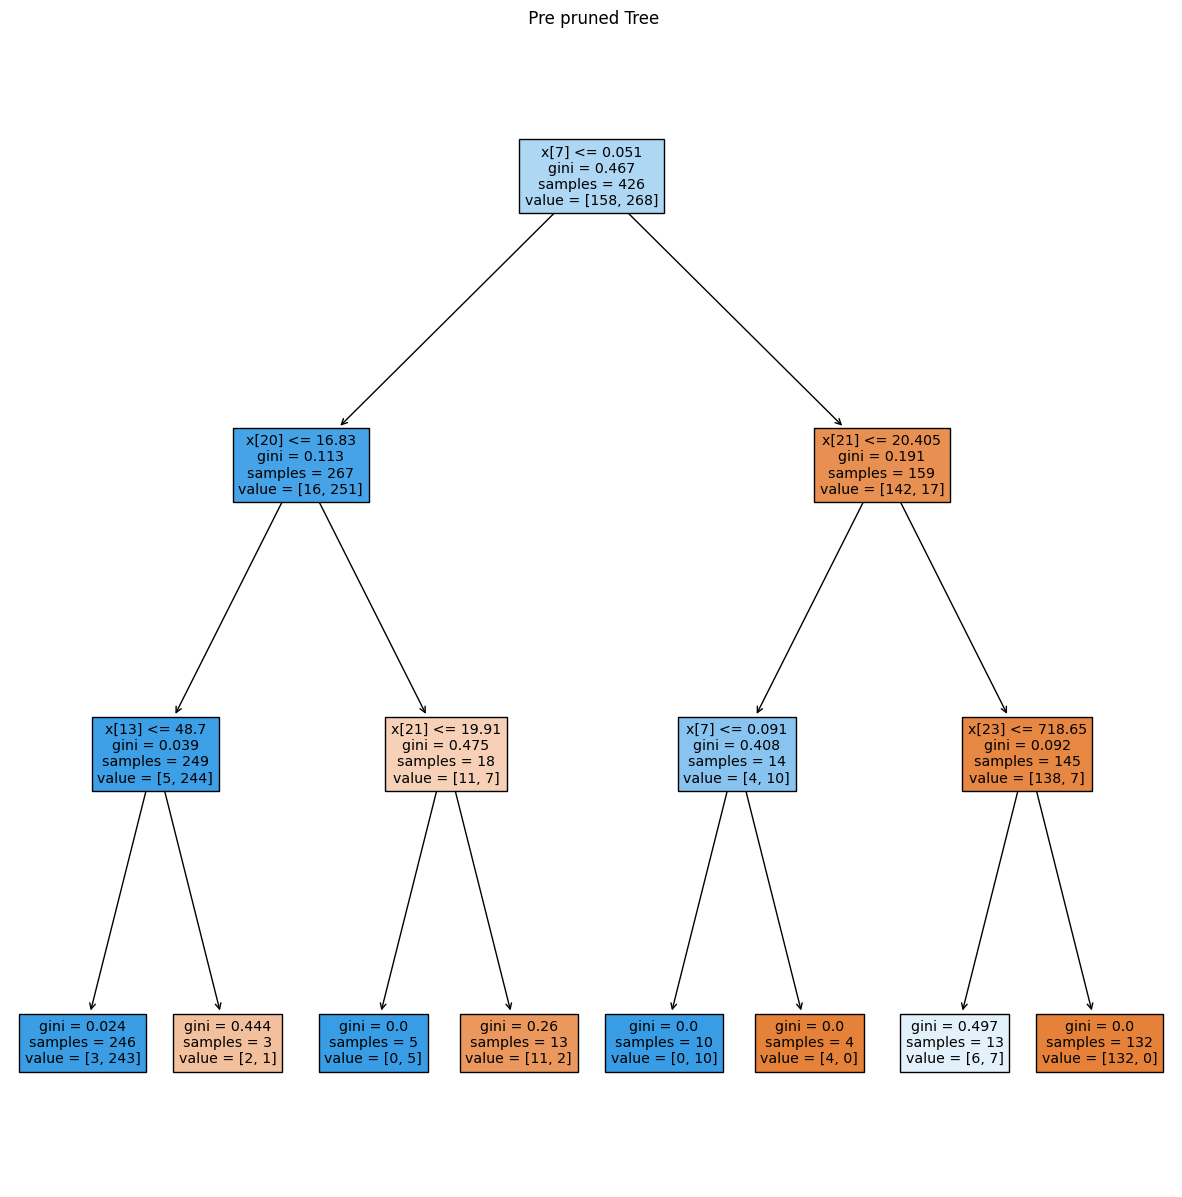

In [20]:
from sklearn import tree

plt.figure(figsize = (15,15))
tree.plot_tree( dt_pre , filled = True)
plt.title( " Pre pruned Tree")
plt.show()

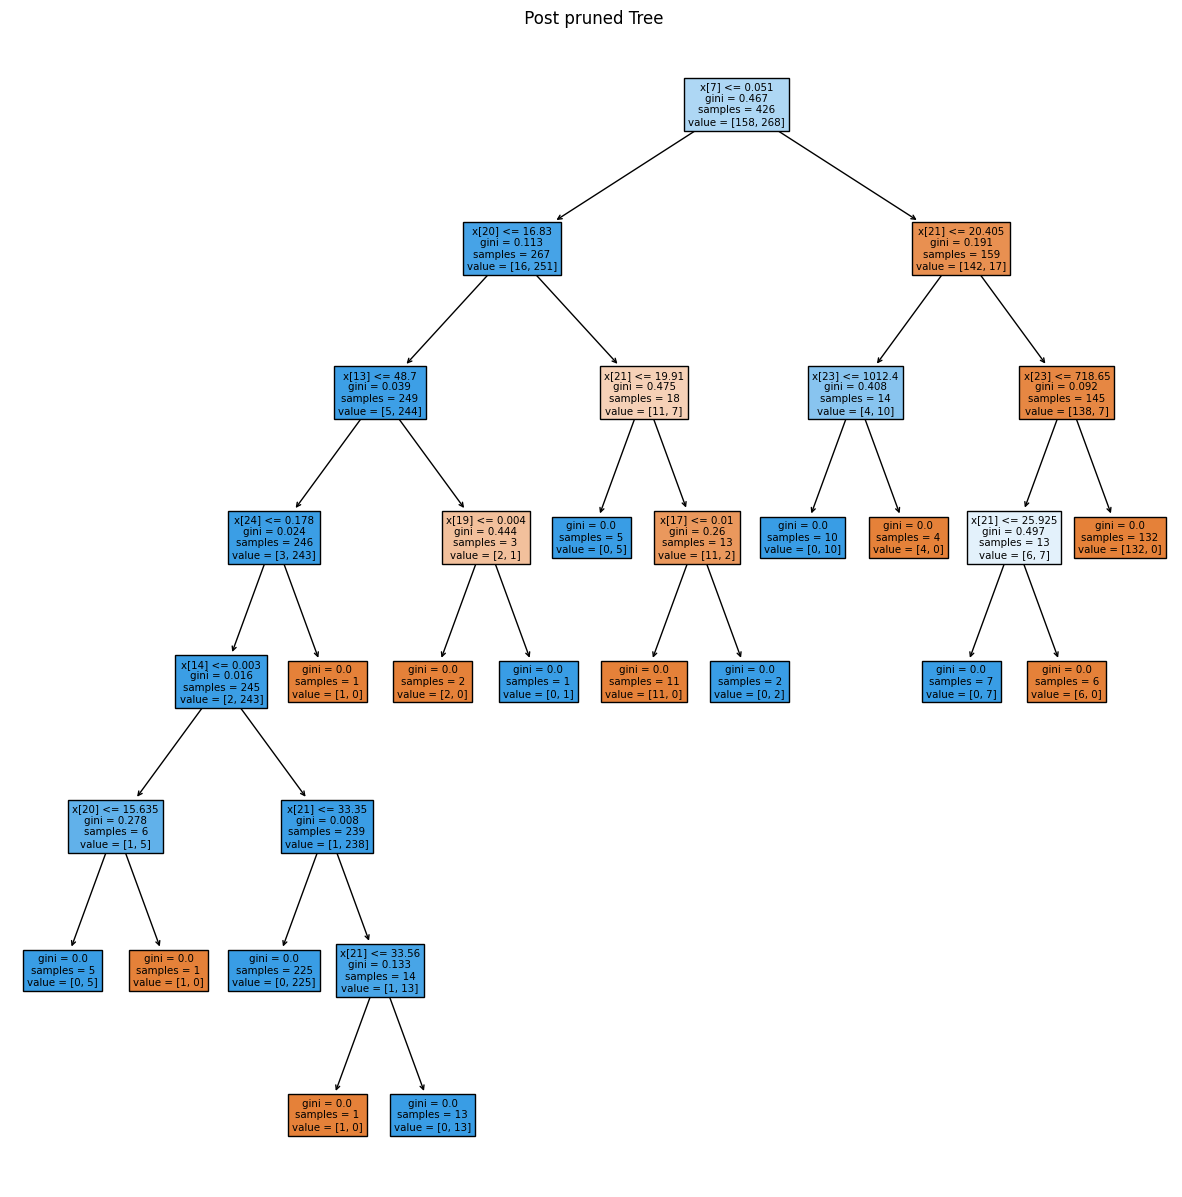

In [21]:
plt.figure(figsize = (15,15))
tree.plot_tree( dt_post , filled = True)
plt.title( " Post pruned Tree")
plt.show()

## Classification report

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test , pred , target_names = ['malignant' , 'benign']))

              precision    recall  f1-score   support

   malignant       0.91      0.94      0.93        54
      benign       0.97      0.94      0.95        89

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test , pred_pre , target_names = ['malignant' , 'benign']))

              precision    recall  f1-score   support

   malignant       0.96      0.93      0.94        54
      benign       0.96      0.98      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test , pred_post, target_names = ['malignant' , 'benign']))

              precision    recall  f1-score   support

   malignant       0.91      0.94      0.93        54
      benign       0.97      0.94      0.95        89

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test , pred_ccp, target_names = ['malignant' , 'benign']))

              precision    recall  f1-score   support

   malignant       0.94      0.94      0.94        54
      benign       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

